In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\gayat\Downloads\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

df.isna()

y--->if output data is continuous--->then we need to apply regression
y--->if output data is discrete--->then we need to apply classification
y--->if output data is categorical and discrete--->then we need to apply classification

In [6]:
#divide data into x and y
x=df.drop("Outcome",axis=1)
y=df["Outcome"]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33
1996,8,179,72,42,130,32.7,0.719,36
1997,6,85,78,0,0,31.2,0.382,42
1998,0,129,110,46,130,67.1,0.319,26


In [7]:
## split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=29)

In [8]:
#train models
from sklearn.linear_model import LogisticRegression

##load the model
model= LogisticRegression()

##fit the model
train_model=model.fit(x_train,y_train)

##make predictions
y_pred=train_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [9]:
from sklearn.metrics import log_loss
logloss=log_loss(y_test,y_pred)
print("logloss of logistic regreesion model is:",logloss)

logloss of logistic regreesion model is: 6.848294143932259


In [10]:
## find accuracy
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,f1_score, recall_score,precision_score
accuracy=accuracy_score(y_test,y_pred)
print("accuracy of logistic regreesion model is:",accuracy)
 
# Confusion Matrix
print("Confusion Matrix of logistic regreesion model is:\n", confusion_matrix(y_test, y_pred))

# Detailed Report (precision, recall, f1-score)
print("Classification Report of logistic regreesion model is:\n", classification_report(y_test, y_pred))

##f1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score of logistic regreesion model is:", f1)
     
## recall
recall = recall_score(y_test, y_pred)
print("Recall of logistic regreesion model is:", recall)


accuracy of logistic regreesion model is: 0.81
Confusion Matrix of logistic regreesion model is:
 [[251  19]
 [ 57  73]]
Classification Report of logistic regreesion model is:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       270
           1       0.79      0.56      0.66       130

    accuracy                           0.81       400
   macro avg       0.80      0.75      0.76       400
weighted avg       0.81      0.81      0.80       400

F1 Score of logistic regreesion model is: 0.6576576576576577
Recall of logistic regreesion model is: 0.5615384615384615


In [11]:
from sklearn.metrics import (accuracy_score
)

y_train_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_train_pred)
print("Training accuracy:", accuracy)

y_test_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", accuracy)

Training accuracy: 0.766875
Test accuracy: 0.81


In [12]:
## comnine actual vs predicted
comparison=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison

,Actual,Predicted
541,1,0
677,0,0
30,0,0
962,0,0
890,0,0
...,...,...
1812,0,0
1192,0,0
1311,0,0
1458,1,1


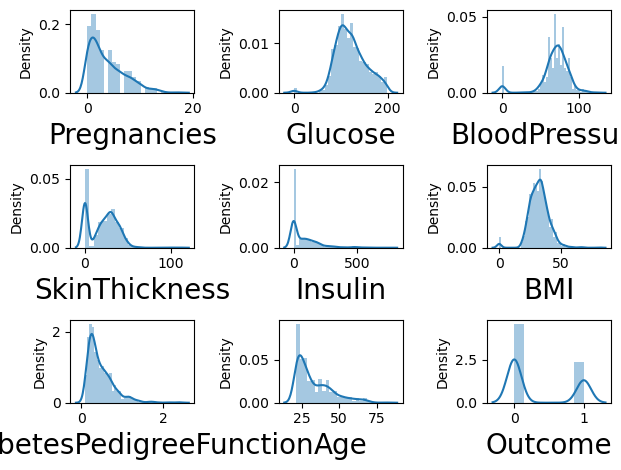

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plotnumber = 1
for column in df:
    if(plotnumber<=9):
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[column])   # better than displot inside subplot
        plt.xlabel(column, fontsize=20)      # ✅ correct function
    plotnumber += 1

plt.tight_layout()
plt.show()

In [14]:
df['BMI']=df['BMI'].replace(0,df['BMI'].median())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
print("BMI:\n",df['BMI'])
print("BLOOD PRESSURE:\n",df['BloodPressure'])
print("INSULIN:\n",df['Insulin'])
print("SKIN THICKNESS:\n",df['SkinThickness'])

BMI:
 0       33.6
1       38.2
2       44.2
3       42.3
4       40.7
        ... 
1995    29.7
1996    32.7
1997    31.2
1998    67.1
1999    30.1
Name: BMI, Length: 2000, dtype: float64
BLOOD PRESSURE:
 0        62
1        82
2        72
3        68
4        62
       ... 
1995     64
1996     72
1997     78
1998    110
1999     72
Name: BloodPressure, Length: 2000, dtype: int64
INSULIN:
 0        40
1       125
2        40
3       250
4       480
       ... 
1995     55
1996    130
1997     40
1998    130
1999     76
Name: Insulin, Length: 2000, dtype: int64
SKIN THICKNESS:
 0       35
1       31
2       23
3       42
4       41
        ..
1995    24
1996    42
1997    23
1998    46
1999    15
Name: SkinThickness, Length: 2000, dtype: int64


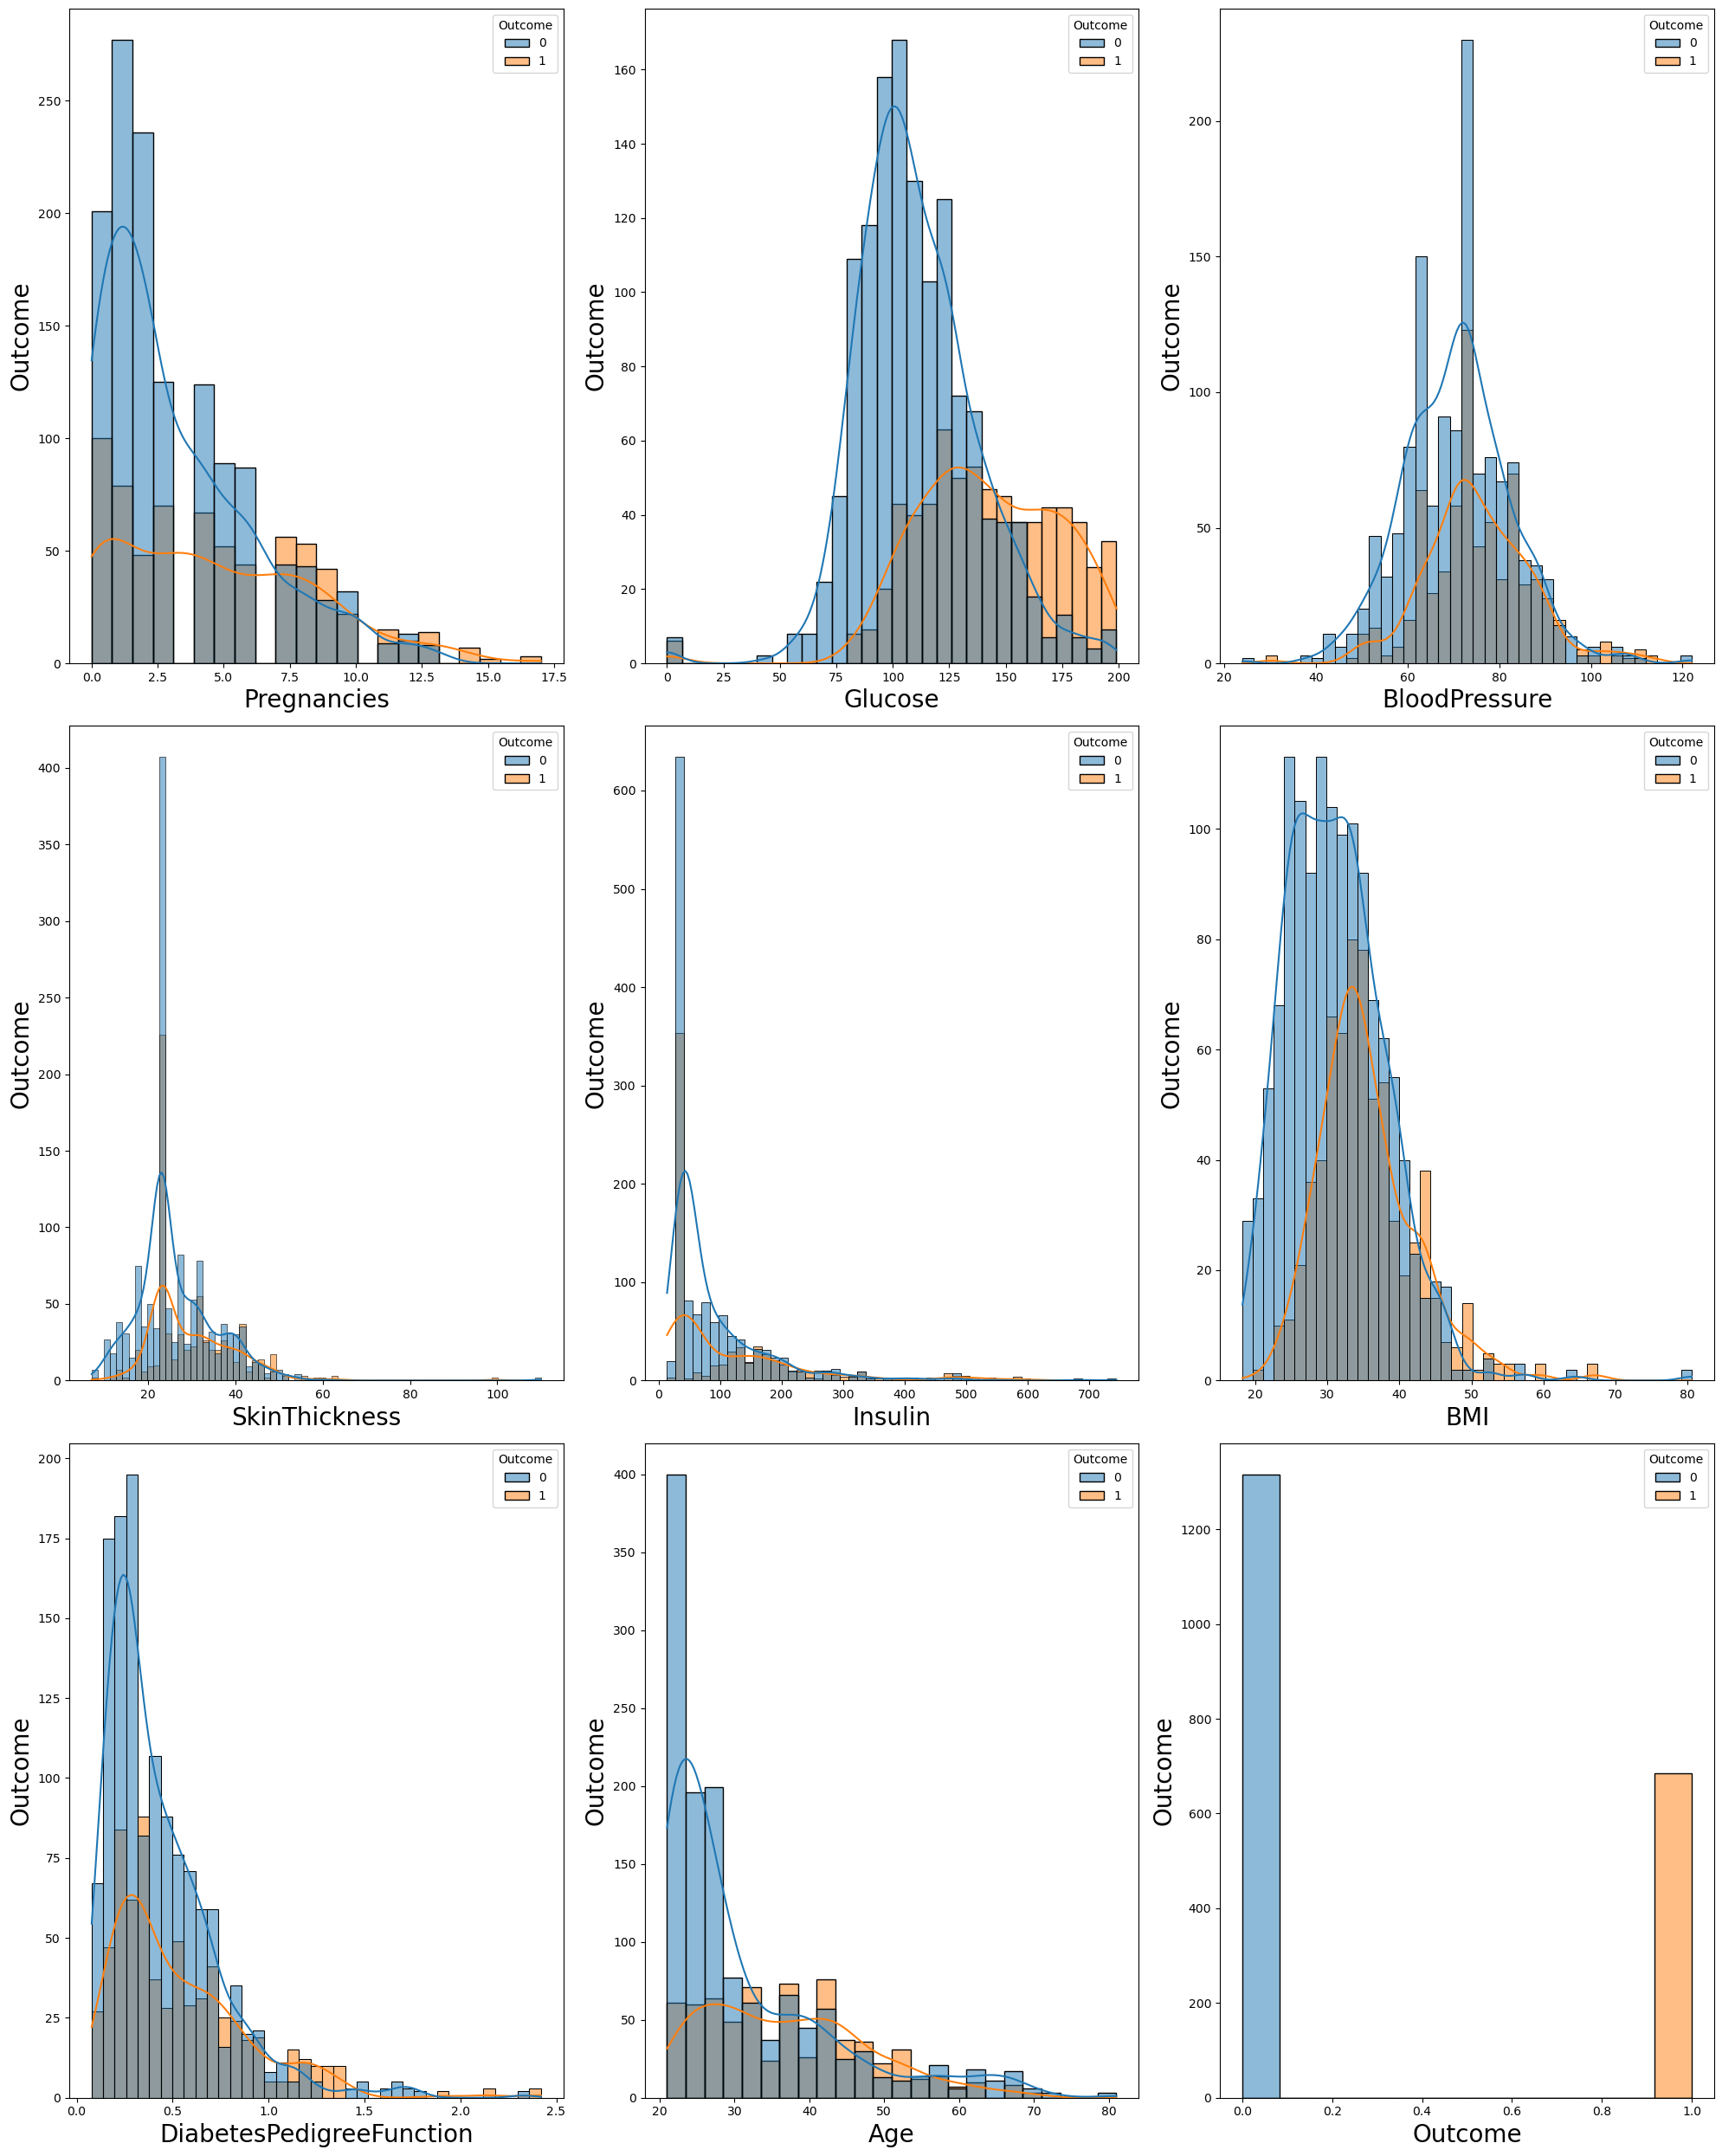

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1
for column in df:
    if(plotnumber<=9):
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(x=df[column],hue=df['Outcome'],kde=True)   # better than displot inside subplot
        plt.xlabel(column, fontsize=20) 
        plt.ylabel('Outcome',fontsize=20)# ✅ correct function
    plotnumber += 1

plt.tight_layout()
plt.show()

1️⃣ Pregnancies
Outcome = 1 (diabetic) patients tend to have more pregnancies.
Higher pregnancy count slightly increases diabetes likelihood.
However, overlap is large → weak to moderate predictor.
Insight:
📌 More pregnancies → higher risk, but not decisive alone.

2️⃣ Glucose ⭐ (Most Important)
Strong right shift for Outcome = 1.
Diabetic patients mostly have glucose > 120
Non-diabetics cluster around lower glucose levels.
Insight:
🔥 Glucose is the strongest indicator of diabetes
Higher glucose → very high diabetes probability.

3️⃣ Blood Pressure
Both classes overlap heavily.
Slightly higher values for diabetics, but difference is small.
Insight:
📌 Blood pressure alone does NOT clearly separate diabetic vs non-diabetic.

4️⃣ Skin Thickness
Many values near 0 (likely missing or unrecorded).
Diabetics show slightly higher skin thickness.
Insight:
⚠️ Data quality issue (zeros).
Moderate usefulness after cleaning missing values.

5️⃣ Insulin
Highly right-skewed.
Many zero values (missing).
Diabetics tend to have much higher insulin levels.
Insight:
⚠️ Important feature but requires preprocessing
(handling zeros / missing values).

6️⃣ BMI ⭐
Diabetics are shifted towards higher BMI (30–50).
Non-diabetics mostly lie below 30–35.
Insight:
🔥 BMI is a strong predictor
Higher BMI → higher diabetes risk.


1️⃣ Diabetes Pedigree Function (DPF)(Genetic / family history influence)
What we see:
Most non-diabetic (0) values are clustered below 0.5.
Diabetic (1) cases extend to higher DPF values (0.6 – 2.5)
Right-skewed distribution for diabetics.
Insight:
Higher DPF → higher genetic risk of diabetes
Clear separation at higher values, but overlap exists at lower values.

2️⃣ Age(Age vs diabetes occurrence)
What we see:
Non-diabetics are mostly concentrated in the 20–35 age range.
Diabetics are more frequent in 35–60+ age range
Probability of diabetes increases with age.
Insight:
Younger individuals are less likely to have diabetes.
Older age groups show a clear rise in diabetic cases.

3️⃣ Outcome (Class Distribution)(Target variable)
What we see:
Outcome = 0 (non-diabetic) significantly higher count
Outcome = 1 (diabetic) much lower count
Insight:
Dataset is imbalanced.
Models may become biased toward predicting non-diabetic.

In [16]:
from scipy import stats 
import statsmodels.api as sm 
Glucose_pos=df [df['Outcome']==1]['Glucose'] 
Glucose_negative=df [df['Outcome']==0]['Glucose']

In [17]:
t_stat,p_val=stats.ttest_ind(Glucose_pos,Glucose_negative)
print("Independent T-test statistic:",t_stat)
print("p-value:",p_val)
if p_val < 0.05:
    print("reject null hypothesis:")
else:
    print("accept null hypothesis:")

Independent T-test statistic: 23.05633354719803
p-value: 1.724006801539328e-104
reject null hypothesis:


# T- TEST
**DEFINATION:**  T-TEST IS USED TO COMPARE MEANS WHEN THE POPULATION VARIANCE IS UN KNOWN OR THE SAMPLE SIZE IS SMALL

----

# INDEPENDENT T-TEST
**EXAMPLE:** COMPARE **GLUCOSE** OF **POSITIVE VS NEGATIVE** PERSON

**HYPOTHESIS**

-H0:GLUCOSE DISTRIBUTION OF POSITIVE = GLUCOSE DISTRIBUTION OF NEGATIVE

-H1:GLUCOSE DISTRIBUTION OF POSITIVE != GLUCOSE DISTRIBUTION OF NEGATIVE


In [18]:
from scipy import stats 
import statsmodels.api as sm 
Glucose_pos=df [df['Outcome']==1]['Pregnancies'] 
Glucose_negative=df [df['Outcome']==0]['Pregnancies']

In [19]:
t_stat,p_val=stats.ttest_ind(Glucose_pos,Glucose_negative)
print("Independent T-test statistic:",t_stat)
print("p-value:",p_val)
if p_val < 0.05:
    print("reject null hypothesis:")
else:
    print("accept null hypothesis:")

Independent T-test statistic: 10.294740851256517
p-value: 2.968017579508808e-24
reject null hypothesis:


In [20]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
from scipy import stats 
import statsmodels.api as sm 
Glucose_pos=df [df['Outcome']==1]['BloodPressure'] 
Glucose_negative=df [df['Outcome']==0]['BloodPressure']

In [22]:
t_stat,p_val=stats.ttest_ind(Glucose_pos,Glucose_negative)
print("Independent T-test statistic:",t_stat)
print("p-value:",p_val)
if p_val < 0.05:
    print("reject null hypothesis:")
else:
    print("accept null hypothesis:")

Independent T-test statistic: 7.906717522386685
p-value: 4.332434442926917e-15
reject null hypothesis:


In [23]:
from scipy import stats 
import statsmodels.api as sm 
Glucose_pos=df [df['Outcome']==1]['SkinThickness'] 
Glucose_negative=df [df['Outcome']==0]['SkinThickness']

In [24]:
t_stat,p_val=stats.ttest_ind(Glucose_pos,Glucose_negative)
print("Independent T-test statistic:",t_stat)
print("p-value:",p_val)
if p_val < 0.05:
    print("reject null hypothesis:")
else:
    print("accept null hypothesis:")

Independent T-test statistic: 8.243567257023205
p-value: 2.9903729132502143e-16
reject null hypothesis:


In [25]:
from scipy import stats 
import statsmodels.api as sm 
Glucose_pos=df [df['Outcome']==1]['Insulin'] 
Glucose_negative=df [df['Outcome']==0]['Insulin']

In [26]:
t_stat,p_val=stats.ttest_ind(Glucose_pos,Glucose_negative)
print("Independent T-test statistic:",t_stat)
print("p-value:",p_val)
if p_val < 0.05:
    print("reject null hypothesis:")
else:
    print("accept null hypothesis:")

Independent T-test statistic: 6.558200400844056
p-value: 6.914620562627028e-11
reject null hypothesis:


In [27]:
from scipy import stats 
import statsmodels.api as sm 
Glucose_pos=df [df['Outcome']==1]['BMI'] 
Glucose_negative=df [df['Outcome']==0]['BMI']

In [28]:
t_stat,p_val=stats.ttest_ind(Glucose_pos,Glucose_negative)
print("Independent T-test statistic:",t_stat)
print("p-value:",p_val)
if p_val < 0.05:
    print("reject null hypothesis:")
else:
    print("accept null hypothesis:")

Independent T-test statistic: 13.164407810509676
p-value: 5.123041339893959e-38
reject null hypothesis:


In [29]:
from scipy import stats 
import statsmodels.api as sm 
Glucose_pos=df [df['Outcome']==1]['Age'] 
Glucose_negative=df [df['Outcome']==0]['Age']

In [30]:
t_stat,p_val=stats.ttest_ind(Glucose_pos,Glucose_negative)
print("Independent T-test statistic:",t_stat)
print("p-value:",p_val)
if p_val < 0.05:
    print("reject null hypothesis:")
else:
    print("accept null hypothesis:")

Independent T-test statistic: 10.880410795440374
p-value: 7.948733933404598e-27
reject null hypothesis:


In [31]:
from scipy import stats 
import statsmodels.api as sm 
Glucose_pos=df [df['Outcome']==1]['DiabetesPedigreeFunction'] 
Glucose_negative=df [df['Outcome']==0]['DiabetesPedigreeFunction']

In [32]:
t_stat,p_val=stats.ttest_ind(Glucose_pos,Glucose_negative)
print("Independent T-test statistic:",t_stat)
print("p-value:",p_val)
if p_val < 0.05:
    print("reject null hypothesis:")
else:
    print("accept null hypothesis:")

Independent T-test statistic: 7.034386057932806
p-value: 2.7384134507979468e-12
reject null hypothesis:


Glucose---->p-value: 1.72e-104
Pregnancies---->p-value: 2.9e-24
BloodPressure----->p-value: 4.33e-15
SkinThickness----->p-value: 2.99e-16
Insulin---->p-value: 6.9e-11
BMI----->p-value: 5.12e-38
Age---->p-value: 7.94e-27
DiabetesPedigreeFunction----->p-value: 2.73e-12

In [35]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.5153943 ,  0.52455322, -0.86930967, ...,  0.13282408,
        -1.06324616,  1.18042417],
       [-1.12049474, -1.1597562 ,  0.80477375, ...,  0.77273898,
        -0.7355513 , -0.85632626],
       [-1.12049474,  0.74288962, -0.03226796, ...,  1.60741059,
         0.49175869, -0.17740945],
       ...,
       [ 0.69480658, -1.12856529,  0.46995707, ..., -0.20104457,
        -0.27492362,  0.75610116],
       [-1.12049474,  0.24383498,  3.14849054, ...,  4.79307391,
        -0.46968566, -0.60173245],
       [-0.5153943 , -1.25332895, -0.03226796, ..., -0.3540677 ,
         0.23516743, -0.68659705]])

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,40,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,72,23,40,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [38]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,72.385500,27.52450,99.374000,32.645200,0.470930,33.090500,0.342000
std,3.306063,32.068636,11.949824,9.56374,98.438245,7.190254,0.323553,11.786423,0.474498
min,0.000000,0.000000,24.000000,7.00000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.00000,40.000000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.00000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.00000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.00000,744.000000,80.600000,2.420000,81.000000,1.000000


In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,-1.065814e-17,-1.563194e-16,5.613288e-16,3.375078e-17,3.375078e-17,-3.836931e-16,1.225686e-16,1.136868e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.120495e+00,-3.779793e+00,-4.050068e+00,-2.146611e+00,-8.675018e-01,-2.009500e+00,-1.214728e+00,-1.026055e+00
25%,-8.179445e-01,-6.918925e-01,-7.019013e-01,-4.732073e-01,-6.033107e-01,-7.018475e-01,-7.015452e-01,-7.714617e-01
50%,-2.128441e-01,-1.304560e-01,-3.226796e-02,-4.732073e-01,-6.033107e-01,-4.802144e-02,-2.934724e-01,-3.471387e-01
75%,6.948066e-01,6.181260e-01,6.373654e-01,4.680825e-01,3.111967e-01,5.779823e-01,4.732099e-01,5.863720e-01
max,4.022859e+00,2.427199e+00,4.152941e+00,8.625927e+00,6.550170e+00,6.671085e+00,6.025474e+00,4.065821e+00


In [45]:
from sklearn.preprocessing  import MinMaxScaler
norm=MinMaxScaler()
x_scaled_norm=norm.fit_transform(x)
x_scaled_norm=pd.DataFrame(x_scaled_norm,columns=x.columns)
x_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,-1.065814e-17,-1.563194e-16,5.613288e-16,3.375078e-17,3.375078e-17,-3.836931e-16,1.225686e-16,1.136868e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.120495e+00,-3.779793e+00,-4.050068e+00,-2.146611e+00,-8.675018e-01,-2.009500e+00,-1.214728e+00,-1.026055e+00
25%,-8.179445e-01,-6.918925e-01,-7.019013e-01,-4.732073e-01,-6.033107e-01,-7.018475e-01,-7.015452e-01,-7.714617e-01
50%,-2.128441e-01,-1.304560e-01,-3.226796e-02,-4.732073e-01,-6.033107e-01,-4.802144e-02,-2.934724e-01,-3.471387e-01
75%,6.948066e-01,6.181260e-01,6.373654e-01,4.680825e-01,3.111967e-01,5.779823e-01,4.732099e-01,5.863720e-01
max,4.022859e+00,2.427199e+00,4.152941e+00,8.625927e+00,6.550170e+00,6.671085e+00,6.025474e+00,4.065821e+00


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=42)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

In [53]:
error_rate

[np.float64(0.036),
 np.float64(0.118),
 np.float64(0.158),
 np.float64(0.188),
 np.float64(0.186),
 np.float64(0.202),
 np.float64(0.188),
 np.float64(0.216),
 np.float64(0.192),
 np.float64(0.204)]